In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2021-10-27 15:41:36.243389


<h2>Lineaarinen regressio - yksi selittävä muuttuja</h2>

Koneoppimisen mallit löytyvät sklearn-kirjastosta (scikit-learn).
Lue lisää https://scikit-learn.org/stable/

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tuon lineaarisen regressiomallin
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [3]:
df = pd.read_excel('http://taanila.fi/linreg1.xlsx')
df

,Kuukausi,Mainoskulut 1000 €,Myynti 1000 €
0,1,1.2,101
1,2,0.8,92
2,3,1.0,110
3,4,1.3,120
4,5,0.7,90
5,6,0.8,82
6,7,1.0,93
7,8,0.6,75
8,9,0.9,91
9,10,1.1,105


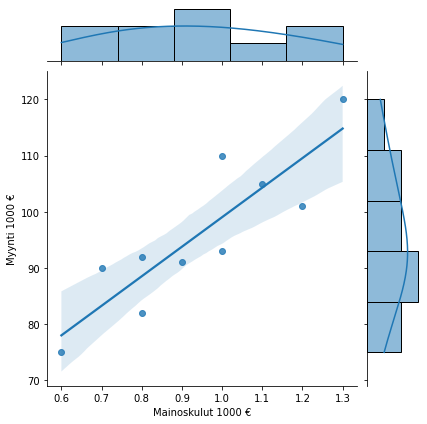

In [4]:
# Riippuvuuden tarkastelua seaborn-kirjaston jointoplot-kaavion avulla
sns.jointplot(data=df, x='Mainoskulut 1000 €', y='Myynti 1000 €', kind='reg')

In [5]:
# Selittävä muuttuja
# Jos selittäviä muuttujia on vain yksi, niin tarvitaan tietokehikoksi (dataframe) muuntaminen (to_frame)
X = df['Mainoskulut 1000 €'].to_frame()

# Selitettävä/ennustettava muuttuja
y = df['Myynti 1000 €'] 

In [6]:
# Sovitan mallin dataan
malli = LinearRegression().fit(X,y)

In [7]:
malli.coef_ # regressiosuoran kulmakerroin

array([52.56756757])

In [8]:
malli.intercept_ # regressiosuoran vakiotermi

46.486486486486505

In [9]:
malli.score(X,y) # selityskerroin

0.7663982928521625

In [10]:
# Myyntiennusteet, jos x = 0.7, 0.8 tai 0.9
malli.predict(pd.DataFrame([0.7, 0.8, 0.9])) 

array([83.28378378, 88.54054054, 93.7972973 ])

<h2>Lisätietoa</h2>

Data-analytiikka Pythonilla: https://tilastoapu.wordpress.com/python/